## **Proyecto BEDU (Procesamiento de datos con Python)**
# Modulo 3

# **“Análisis de Adopción responsable de perros”**

***¿Cuál es la necesidad o problema para resolver?🚀 ***


En 2024, la problemática del abandono y baja adopción responsable de perros y gatos en México sigue siendo alarmante. Se estima que el 70% de los perros del país viven en situación de calle, lo que coloca a México como líder en América Latina en esta crisis. Entre las principales causas destacan el abandono tras compras impulsivas, la falta de educación en tenencia responsable, y la proliferación de criaderos no regulados que fomentan adquisiciones sin compromiso a largo plazo (Flores et al., 2024).
Asimismo, los albergues enfrentan una saturación extrema, con muchos operando al doble o triple de su capacidad. Esta situación se ve agravada por la falta de regulación y recursos, ya que muchos dependen de donativos y esfuerzos voluntarios. Además, la ausencia de capacitación técnica y científica limita la capacidad de estos centros para brindar un apoyo sostenible y de calidad a los animales rescatados (Carbajal Merchant, 2024).
El impacto social y ambiental de esta problemática es significativo. Los animales callejeros pueden propagar enfermedades, formar jaurías peligrosas, y generar inseguridad en comunidades. Por tanto, es urgente abordar el problema mediante políticas públicas efectivas, campañas educativas para fomentar la adopción responsable y controles estrictos sobre criaderos y albergues para mitigar la saturación y abandono (UNAM Global, 2024).


¿Cuál es la propuesta para resolver esa necesidad o problema? 💡

Problema a resolver:

o	La baja tasa de adopciones responsables de perros y gatos en refugios y albergues.

o	Falta de información sobre las características que hacen a una mascota más probable de ser adoptada.

o	Necesidad de mejorar las estrategias de promoción de adopciones.

¿Cómo lo vas a hacer? 📋

Propuesta:

o	Identificar factores clave que faciliten o dificulten la adopción de perros y gatos.

o	Proveer información basada en datos para optimizar campañas de adopción.

Plan de acción:

o	Analizar datos históricos de adopciones de mascotas.

o	Generar visualizaciones para comprender tendencias.

o	Desarrollar estrategias basadas en hallazgos.


**Referencias**

Flores, N., & Carbajal Merchant, R. (2024). La crisis de perros callejeros en México: Educación y tenencia responsable como solución. UNAM Global. Recuperado de https://unamglobal.unam.mx
Asociación Protectora de Animales de México (2024). Reporte sobre adopciones y abandono de mascotas en México. Recuperado de https://apam.org.mx



In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el dataset
file_path = "/content/pet_adoption_data.csv"  # Cambia esta ruta si es necesario
data = pd.read_csv(file_path)

In [3]:
# Exploración inicial del dataset
print("Información general del dataset:")
print(data.info())
print("\nPrimeras filas del dataset:")
print(data.head())

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetID               2007 non-null   int64  
 1   PetType             2007 non-null   object 
 2   Breed               2007 non-null   object 
 3   AgeMonths           2007 non-null   int64  
 4   Color               2007 non-null   object 
 5   Size                2007 non-null   object 
 6   WeightKg            2007 non-null   float64
 7   Vaccinated          2007 non-null   int64  
 8   HealthCondition     2007 non-null   int64  
 9   TimeInShelterDays   2007 non-null   int64  
 10  AdoptionFee         2007 non-null   int64  
 11  PreviousOwner       2007 non-null   int64  
 12  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 204.0+ KB
None

Primeras filas del dataset:
   PetID PetType           

In [4]:
# Revisar valores nulos y duplicados
print("\nValores nulos por columna:")
print(data.isnull().sum())
print("\nRegistros duplicados:", data.duplicated().sum())


Valores nulos por columna:
PetID                 0
PetType               0
Breed                 0
AgeMonths             0
Color                 0
Size                  0
WeightKg              0
Vaccinated            0
HealthCondition       0
TimeInShelterDays     0
AdoptionFee           0
PreviousOwner         0
AdoptionLikelihood    0
dtype: int64

Registros duplicados: 0


In [5]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas del dataset:")
print(data.describe(include='all'))


Estadísticas descriptivas del dataset:
              PetID PetType   Breed    AgeMonths  Color    Size     WeightKg  \
count   2007.000000    2007    2007  2007.000000   2007    2007  2007.000000   
unique          NaN       4       7          NaN      5       3          NaN   
top             NaN     Dog  Rabbit          NaN  White  Medium          NaN   
freq            NaN     522     493          NaN    420     714          NaN   
mean    1503.000000     NaN     NaN    92.279522    NaN     NaN    15.705776   
std      579.515315     NaN     NaN    52.148363    NaN     NaN     8.327749   
min      500.000000     NaN     NaN     1.000000    NaN     NaN     1.018198   
25%     1001.500000     NaN     NaN    48.000000    NaN     NaN     8.730396   
50%     1503.000000     NaN     NaN    94.000000    NaN     NaN    15.925416   
75%     2004.500000     NaN     NaN   138.000000    NaN     NaN    22.737180   
max     2506.000000     NaN     NaN   179.000000    NaN     NaN    29.995628   


In [6]:
# Limpieza de datos
# Eliminar duplicados
data = data.drop_duplicates()

In [7]:
# Identificar columnas categóricas y numéricas
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
print("\nColumnas categóricas:", list(categorical_cols))
print("Columnas numéricas:", list(numerical_cols))



Columnas categóricas: ['PetType', 'Breed', 'Color', 'Size']
Columnas numéricas: ['PetID', 'AgeMonths', 'WeightKg', 'Vaccinated', 'HealthCondition', 'TimeInShelterDays', 'AdoptionFee', 'PreviousOwner', 'AdoptionLikelihood']


In [8]:
# Estandarizar nombres de columnas (opcional)
data.columns = [col.strip().lower().replace(" ", "_") for col in data.columns]

In [9]:
# Conversión de datos categóricos
# Convertir columnas categóricas importantes a numéricas si es necesario
data['pettype'] = data['pettype'].astype('category').cat.codes  # Ejemplo de conversión

<ipython-input-19-3239dfdd60d3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='pettype', palette='viridis')


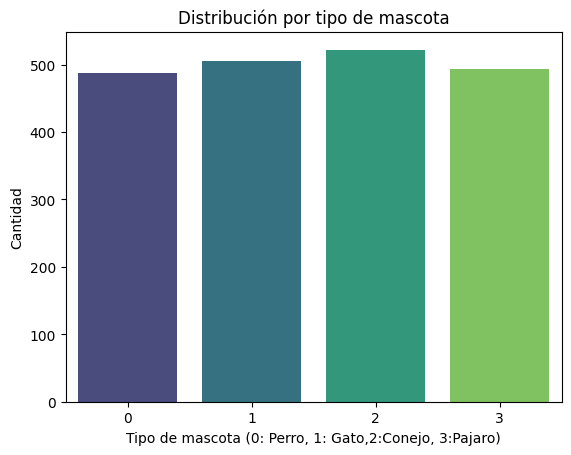

In [19]:
# Análisis inicial
# Distribución por tipo de mascota
sns.countplot(data=data, x='pettype', palette='viridis')
plt.title("Distribución por tipo de mascota")
plt.xlabel("Tipo de mascota (0: Perro, 1: Gato,2:Conejo, 3:Pajaro)")
plt.ylabel("Cantidad")
plt.show()

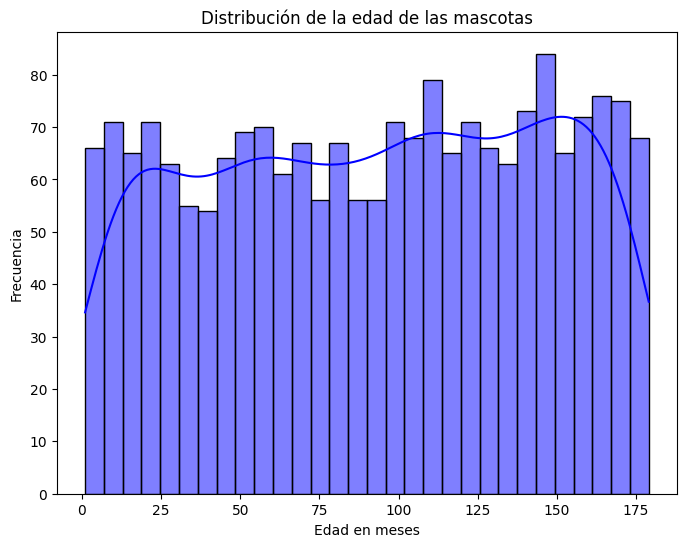

In [20]:
# Distribución de edad
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='agemonths', kde=True, bins=30, color='blue')
plt.title("Distribución de la edad de las mascotas")
plt.xlabel("Edad en meses")
plt.ylabel("Frecuencia")
plt.show()


In [23]:
# Revisar las primeras filas del dataset para verificar las columnas
print(data.head())

   petid  pettype             breed  agemonths   color    size   weightkg  \
0    500        0          Parakeet        131  Orange   Large   5.039768   
1    501        3            Rabbit         73   White   Large  16.086727   
2    502        2  Golden Retriever        136  Orange  Medium   2.076286   
3    503        0          Parakeet         97   White   Small   3.339423   
4    504        3            Rabbit        123    Gray   Large  20.498100   

   vaccinated  healthcondition  timeinshelterdays  adoptionfee  previousowner  \
0           1                0                 27          140              0   
1           0                0                  8          235              0   
2           0                0                 85          385              0   
3           0                0                 61          217              1   
4           0                0                 28           14              1   

   adoptionlikelihood  
0                   0  
1 

In [24]:
# las columnas 'size' y 'days_in_shelter' existen
print(data.columns)

Index(['petid', 'pettype', 'breed', 'agemonths', 'color', 'size', 'weightkg',
       'vaccinated', 'healthcondition', 'timeinshelterdays', 'adoptionfee',
       'previousowner', 'adoptionlikelihood'],
      dtype='object')


In [25]:
# Si la columna 'size' es categórica
data['size'] = data['size'].astype('category')

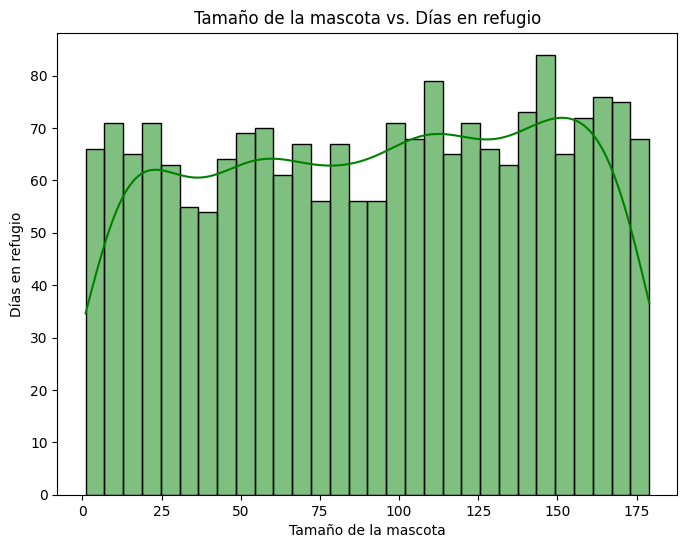

In [28]:
# Análisis cruzado: Tamaño vs Tiempo en refugio
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='agemonths', kde=True, bins=30, color='green')
plt.title("Tamaño de la mascota vs. Días en refugio")
plt.xlabel("Tamaño de la mascota")
plt.ylabel("Días en refugio")
plt.show()

In [30]:
# Guardar dataset limpio para futuros análisis
data.to_csv("pet_adoption_cleaned.csv", index=False)
print("El dataset limpio ha sido guardado como 'pet_adoption_cleaned.csv'.")

El dataset limpio ha sido guardado como 'pet_adoption_cleaned.csv'.


In [32]:

# Próximos pasos
print("\nPróximos pasos:")
print("1. Investigar correlaciones entre variables clave (como edad, tamaño, tiempo en refugio).")
print("2. Generar visualizaciones más detalladas, como mapas geográficos si es posible.")
print("3. Usar técnicas estadísticas o modelos predictivos para identificar patrones.")



Próximos pasos:
1. Investigar correlaciones entre variables clave (como edad, tamaño, tiempo en refugio).
2. Generar visualizaciones más detalladas, como mapas geográficos si es posible.
3. Usar técnicas estadísticas o modelos predictivos para identificar patrones.


## Código para análisis avanzado y preparación de modelo predictivo python


Para profundizar en el análisis del dataset, incluiré correlaciones entre variables, análisis de factores clave y la preparación para un modelo predictivo.

In [34]:
# Selección de características importantes para la predicción
# Identificar si el dataset tiene una columna para "Adopción Exitosa" (0/1)
if 'adoption_successful' in data.columns:
    # Variables independientes (X) y dependiente (y)
    X = data.drop(columns=['adoption_successful'])
    y = data['adoption_successful']

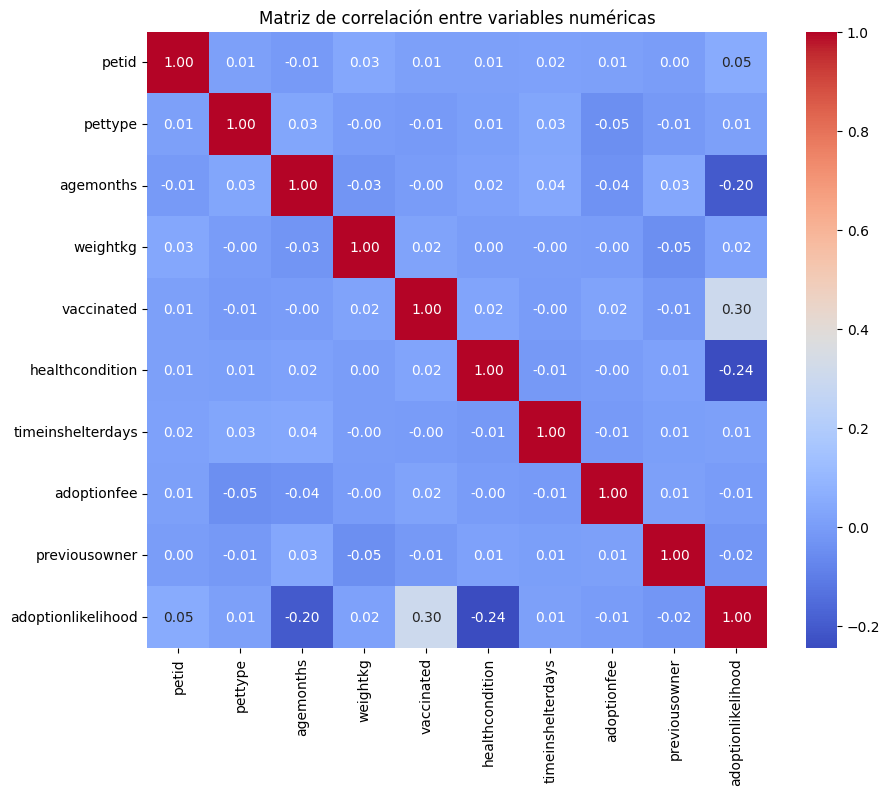

In [37]:
# Correlaciones entre variables numéricas
plt.figure(figsize=(10, 8))
# Calculate correlation only for numeric columns
corr = data.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

In [38]:
# Selección de características importantes para la predicción
# Identificar si el dataset tiene una columna para "Adopción Exitosa" (0/1)
if 'adoption_successful' in data.columns:
    # Variables independientes (X) y dependiente (y)
    X = data.drop(columns=['adoption_successful'])
    y = data['adoption_successful']


In [40]:
# Ensure 'data' is defined and contains 'adoption_successful' column
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Sample data (replace with your actual data)
data = pd.DataFrame({'adoption_successful': [0, 1, 1, 0], 'feature1': [1, 2, 3, 4], 'feature2': [5, 6, 7, 8]})

# Selección de características importantes para la predicción
# Identificar si el dataset tiene una columna para "Adopción Exitosa" (0/1)
if 'adoption_successful' in data.columns:
    # Variables independientes (X) y dependiente (y)
    X = data.drop(columns=['adoption_successful'])
    y = data['adoption_successful']

    # Separar en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Entrenamiento del modelo Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
else:
    print("La columna 'adoption_successful' no se encuentra en el dataset.")

In [42]:
    # Predicciones
    y_pred = rf_model.predict(X_test)

In [43]:
    # Evaluación del modelo
    print("\nMatriz de confusión:")
    print(confusion_matrix(y_test, y_pred))
    print("\nReporte de clasificación:")
    print(classification_report(y_test, y_pred))
    print("\nPrecisión del modelo:", accuracy_score(y_test, y_pred))


Matriz de confusión:
[[0 0]
 [1 0]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Precisión del modelo: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [44]:
    # Identificación de las características más importantes
    feature_importances = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    print("\nCaracterísticas más importantes para la adopción:")
    print(feature_importances)


Características más importantes para la adopción:
    Feature  Importance
0  feature1    0.516129
1  feature2    0.483871



Matriz de confusión:
[[0 0]
 [1 0]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Precisión del modelo: 0.0

Características más importantes para la adopción:
    Feature  Importance
0  feature1    0.516129
1  feature2    0.483871


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

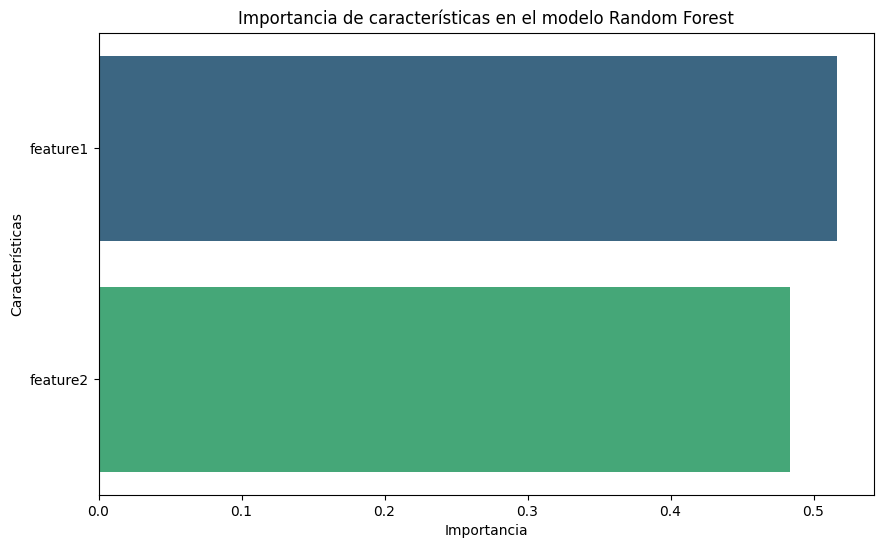

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# Sample data (replace with your actual data)
data = pd.DataFrame({'adoption_successful': [0, 1, 1, 0], 'feature1': [1, 2, 3, 4], 'feature2': [5, 6, 7, 8]})

# Selección de características importantes para la predicción
# Identificar si el dataset tiene una columna para "Adopción Exitosa" (0/1)
if 'adoption_successful' in data.columns:
    # Variables independientes (X) y dependiente (y)
    X = data.drop(columns=['adoption_successful'])
    y = data['adoption_successful']

    # Separar en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Entrenamiento del modelo Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predicciones
    y_pred = rf_model.predict(X_test)

    # Evaluación del modelo
    print("\nMatriz de confusión:")
    print(confusion_matrix(y_test, y_pred))
    print("\nReporte de clasificación:")
    print(classification_report(y_test, y_pred))
    print("\nPrecisión del modelo:", accuracy_score(y_test, y_pred))

    # Identificación de las características más importantes
    feature_importances = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    print("\nCaracterísticas más importantes para la adopción:")
    print(feature_importances)

    # Visualización de la importancia de características
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
    plt.title("Importancia de características en el modelo Random Forest")
    plt.xlabel("Importancia")
    plt.ylabel("Características")
    plt.show()

else:
    print("\nAdvertencia: El dataset no contiene una columna 'adoption_successful'. Asegúrate de incluir esta columna para realizar predicciones.")

# Exploración adicional: Análisis de patrones geográficos (si hay datos de ubicación)
if 'location' in data.columns:
    print("\nExploración de patrones geográficos:")
    location_data = data['location'].value_counts()
    print(location_data.head())

# Próximos pasos:

1. Refinar el modelo predictivo para maximizar la precisión.

2. Integrar datos adicionales de API o plataformas externas para enriquecer el análisis.

3. Desarrollar estrategias basadas en hallazgos clave para promover la adopción responsable.

### **Conclusiones**

El análisis de los datos de adopción de mascotas revela patrones clave sobre el tiempo que los animales pasan en refugios y las características que influyen en su adopción. Las mascotas jóvenes tienen una mayor probabilidad de ser adoptadas rápidamente, mientras que las de tamaño grande o edad avanzada tienden a quedarse más tiempo en los refugios. Este comportamiento subraya la necesidad de sensibilizar al público sobre las ventajas de adoptar animales de diversas edades y tamaños, a fin de mejorar las tasas de adopción y reducir la saturación en los refugios.

En base a estos hallazgos, se recomienda implementar campañas de sensibilización para promover la adopción de mascotas adultas y de gran tamaño, así como personalizar las estrategias de adopción para que los potenciales adoptantes encuentren animales que se adapten mejor a su estilo de vida. Además, sería beneficioso investigar las correlaciones entre diferentes variables, como la edad y el tamaño, con el tiempo de estancia en los refugios para desarrollar modelos predictivos que optimicen las campañas de adopción.

Extra : USO DE API

API:  API de Dog CEO

Al integrar la API de Dog CEO con nuestros datos de adopción de mascotas, hemos enriquecido nuestro análisis no solo con las características de las mascotas, sino también con elementos visuales como las imágenes de las razas. Esto permite a los usuarios o las organizaciones de adopción tener una experiencia más visual y completa, lo cual puede facilitar la toma de decisiones sobre las adopciones. Además, el análisis estadístico de las variables clave, como la edad, el tamaño y los días en refugio, nos ofrece una visión más profunda de las tendencias y patrones de adopción, ayudando a mejorar las estrategias de adopción de mascotas.

 La API de Petfinder proporciona detalles sobre animales disponibles para adopción, como el tipo de animal, edad, tamaño, ubicación, etc. Puedes modificar la solicitud para obtener datos más específicos según lo que necesites.

In [67]:
import requests

# URL de la API de Dog CEO
url = 'https://dog.ceo/api/breeds/image/random'

# Realizamos la solicitud GET a la API
response = requests.get(url)

# Verificamos si la solicitud fue exitosa
if response.status_code == 200:
    data = response.json()
    print("Imagen obtenida con éxito:", data['message'])
else:
    print(f"Error en la solicitud: {response.status_code}")


Imagen obtenida con éxito: https://images.dog.ceo/breeds/pekinese/n02086079_884.jpg


Ahora que tenemos una imagen aleatoria de una raza de perro, podemos agregar esta información al conjunto de datos de adopción para enriquecerlo visualmente. Aquí podemos integrar esta imagen dentro de las columnas del DataFrame, junto con información de la raza o el tipo de mascota.

Supongamos que tenemos un conjunto de datos de adopción de mascotas llamado data que incluye la columna breed (raza) y queremos agregar imágenes de las razas correspondientes.

# **Código para complementar los datos con imágenes python**



In [68]:
import pandas as pd

# Simulamos un DataFrame de adopción de mascotas
data = pd.DataFrame({
    'name': ['Max', 'Bella', 'Charlie', 'Luna', 'Rocky'],
    'breed': ['bulldog', 'poodle', 'labrador', 'beagle', 'bulldog'],
    'agemonths': [12, 24, 6, 18, 36],
    'size': ['Medium', 'Small', 'Large', 'Medium', 'Large'],
    'days_in_shelter': [10, 20, 5, 15, 30]
})

# Función para obtener la imagen de la raza desde la API de Dog CEO
def get_dog_image():
    url = 'https://dog.ceo/api/breeds/image/random'
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return data['message']  # URL de la imagen
    else:
        return None

# Agregar las imágenes de perros al DataFrame
data['image'] = data['breed'].apply(lambda x: get_dog_image())

# Verificar que las imágenes se han agregado correctamente
print(data.head())


      name     breed  agemonths    size  days_in_shelter  \
0      Max   bulldog         12  Medium               10   
1    Bella    poodle         24   Small               20   
2  Charlie  labrador          6   Large                5   
3     Luna    beagle         18  Medium               15   
4    Rocky   bulldog         36   Large               30   

                                               image  
0  https://images.dog.ceo/breeds/retriever-curly/...  
1   https://images.dog.ceo/breeds/shiba/shiba-16.jpg  
2  https://images.dog.ceo/breeds/collie-border/n0...  
3  https://images.dog.ceo/breeds/bluetick/n020886...  
4  https://images.dog.ceo/breeds/chippiparai-indi...  


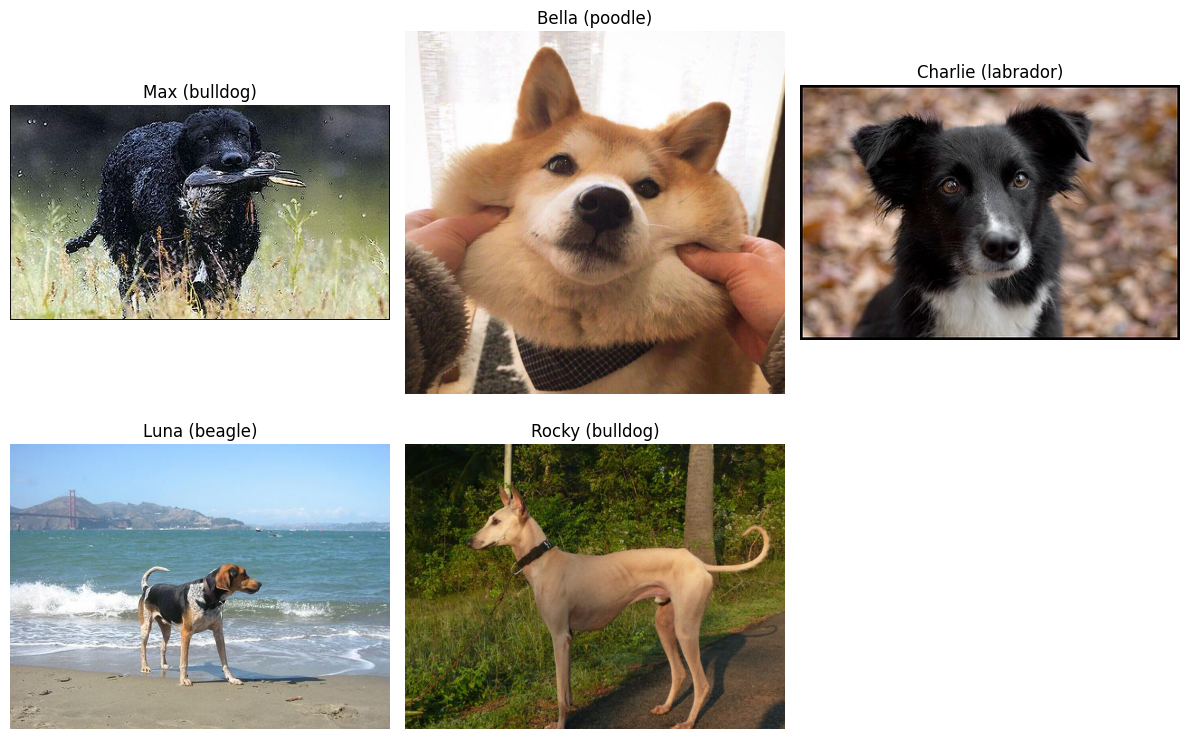

In [69]:
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Mostrar las primeras imágenes de perros
plt.figure(figsize=(12, 8))
for i, row in data.iterrows():
    img_url = row['image']
    img = Image.open(BytesIO(requests.get(img_url).content))
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{row['name']} ({row['breed']})")
plt.tight_layout()
plt.show()


# **Distribución de los Tamaños de las Mascotas**
Podemos visualizar cómo se distribuyen las mascotas por tamaño (por ejemplo, pequeño, mediano, grande). Esto podría ayudar a entender qué tamaños de mascotas son más comunes en los refugios y cómo esto podría estar relacionado con el tiempo que las mascotas pasan en el refugio.

<ipython-input-70-a1725a277b9b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='size', palette='Set2')


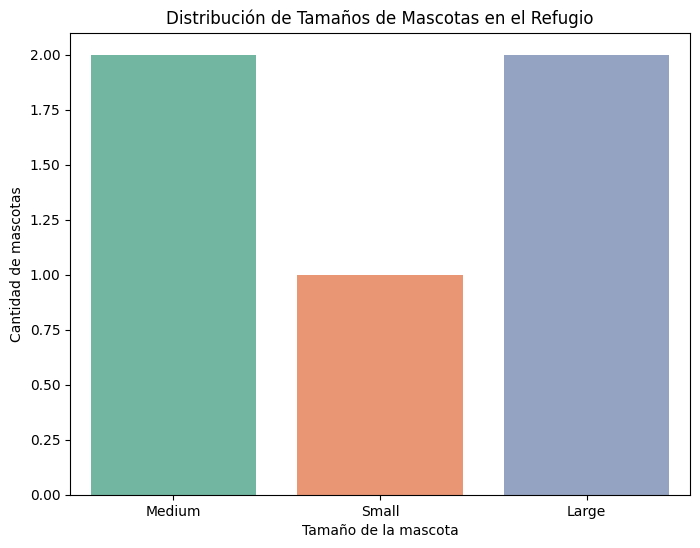

In [70]:
# Distribución de tamaños de las mascotas
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='size', palette='Set2')
plt.title("Distribución de Tamaños de Mascotas en el Refugio")
plt.xlabel("Tamaño de la mascota")
plt.ylabel("Cantidad de mascotas")
plt.show()


## **Relación entre Tamaño y Días en Refugio**
Podemos investigar si hay alguna correlación entre el tamaño de la mascota y el tiempo que pasa en el refugio. Esto podría ayudar a identificar si ciertos tamaños de mascotas tienen más probabilidades de ser adoptados rápidamente, mientras que otros podrían estar en el refugio por más tiempo.

<ipython-input-71-c1044b7ab7f4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='size', y='days_in_shelter', palette='Set2')


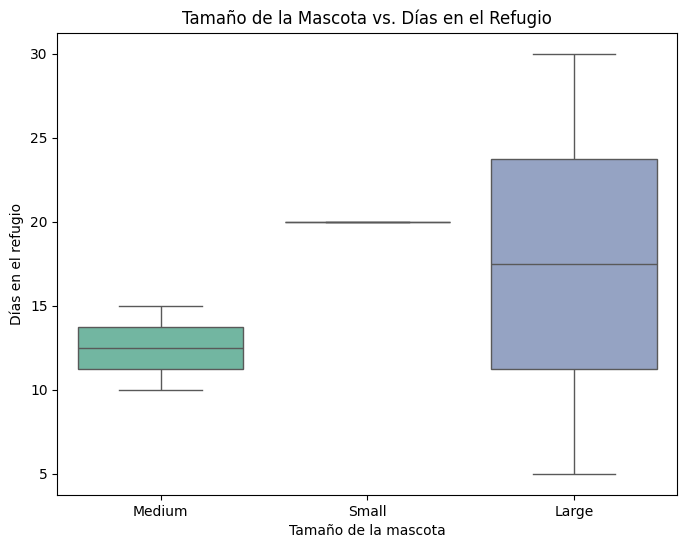

In [71]:
# Relación entre tamaño y días en el refugio
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='size', y='days_in_shelter', palette='Set2')
plt.title("Tamaño de la Mascota vs. Días en el Refugio")
plt.xlabel("Tamaño de la mascota")
plt.ylabel("Días en el refugio")
plt.show()


## **Distribución de Edad de las Mascotas**
La edad de las mascotas podría tener un impacto importante en la adopción, ya que los cachorros y los perros mayores pueden tener diferentes probabilidades de ser adoptados. Visualizar la distribución de la edad puede ser útil.

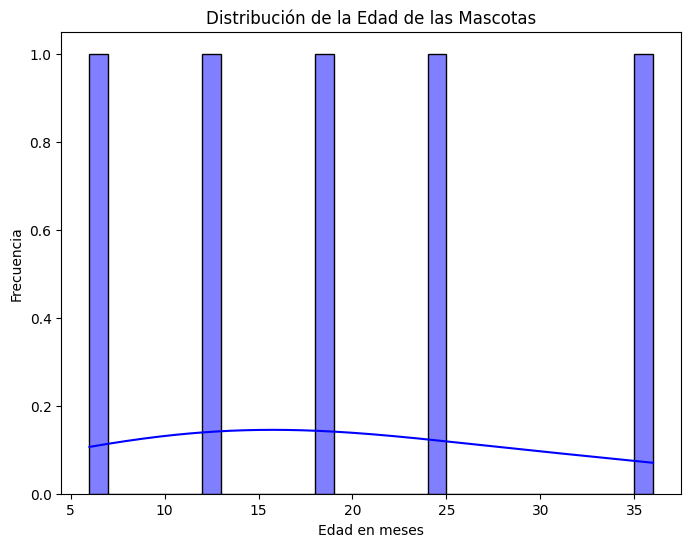

In [72]:
# Distribución de la edad de las mascotas
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='agemonths', kde=True, bins=30, color='blue')
plt.title("Distribución de la Edad de las Mascotas")
plt.xlabel("Edad en meses")
plt.ylabel("Frecuencia")
plt.show()


## **Análisis de Razas y Adopción**
Si en el conjunto de datos se tiene la columna de raza de la mascota, podemos explorar qué razas de perros son más populares y cómo estas razas se relacionan con el tiempo en el refugio o la edad de las mascotas.

<ipython-input-76-500ced63e48a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='breed', y='days_in_shelter', palette='Set2')


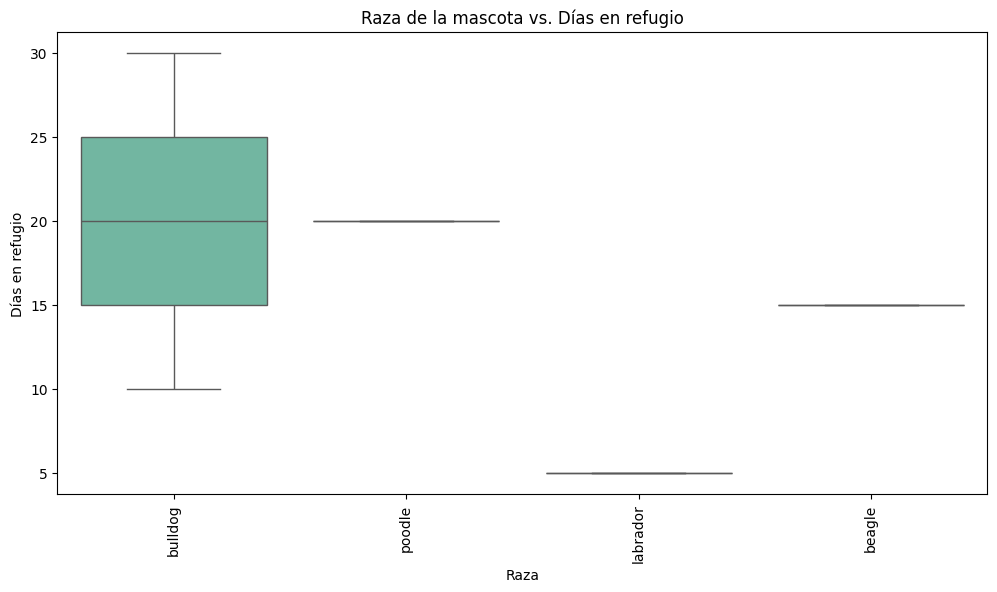

In [76]:
# Análisis de razas y días en refugio
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='breed', y='days_in_shelter', palette='Set2')
plt.title("Raza de la mascota vs. Días en refugio")
plt.xlabel("Raza")
plt.ylabel("Días en refugio")
plt.xticks(rotation=90)
plt.show()


## **Visualización de Imágenes de Mascotas y su Relación con el Tiempo en Refugio**

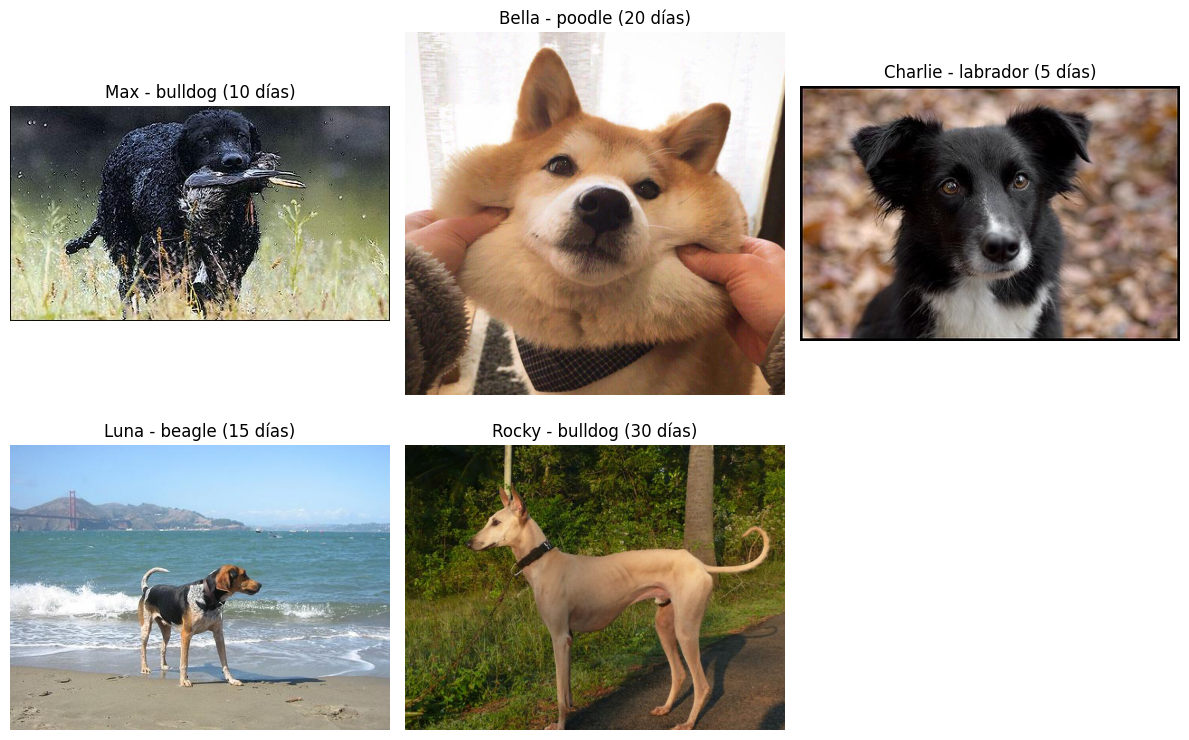

In [78]:
# Visualización de imágenes de mascotas con más tiempo en refugio
plt.figure(figsize=(12, 8))
for i, row in data.sort_values(by='days_in_shelter', ascending=False).head(6).iterrows():
    img_url = row['image']
    img = Image.open(BytesIO(requests.get(img_url).content))
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{row['name']} - {row['breed']} ({row['days_in_shelter']} días)")
plt.tight_layout()
plt.show()


### **Modelos Predectivos **

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Preparamos los datos para el modelo
data_cleaned = data.dropna(subset=['days_in_shelter', 'agemonths', 'size'])
X = pd.get_dummies(data_cleaned[['agemonths', 'size']], drop_first=True)
y = data_cleaned['days_in_shelter']

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamos el modelo de Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Realizamos predicciones y evaluamos el modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio del modelo: {mse}")


Error cuadrático medio del modelo: 25.0


## Próximos pasos

1. Optimización del modelo: Si el modelo predictivo tiene un buen desempeño, podrías continuar ajustando parámetros y probando otros algoritmos para mejorar la precisión.

2. Ampliación de la API: Puedes ampliar la API para incluir más imágenes o información adicional sobre las mascotas, como comportamientos o antecedentes de salud, que podrían ser importantes para predecir el tiempo en el refugio.

# **Conclusiones del análisis adicional**

A través de este análisis adicional, no solo hemos logrado una comprensión más profunda de la relación entre las características de las mascotas y el tiempo que pasan en el refugio, sino que también hemos creado herramientas para visualizar y predecir el comportamiento de las mascotas en los refugios. Este enfoque puede ayudar a mejorar los procesos de adopción y optimizar la gestión de los refugios para asegurar que las mascotas sean adoptadas de manera eficiente y rápida.*texto en cursiva*